In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("covid_19_data.csv")

In [2]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [4]:
df.drop(['Last Update'],axis=1,inplace=True)
df.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [5]:
df.head()

SNo ObservationDate      State         Country  Confirmed  Deaths  \
0    1      01/22/2020      Anhui  Mainland China        1.0     0.0   
1    2      01/22/2020    Beijing  Mainland China       14.0     0.0   
2    3      01/22/2020  Chongqing  Mainland China        6.0     0.0   
3    4      01/22/2020     Fujian  Mainland China        1.0     0.0   
4    5      01/22/2020      Gansu  Mainland China        0.0     0.0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [6]:
df.isnull().sum()

SNo                    0
ObservationDate        0
State              78100
Country                0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
df = df.fillna("unknown")
df

SNo ObservationDate              State         Country  Confirmed  \
0            1      01/22/2020              Anhui  Mainland China        1.0   
1            2      01/22/2020            Beijing  Mainland China       14.0   
2            3      01/22/2020          Chongqing  Mainland China        6.0   
3            4      01/22/2020             Fujian  Mainland China        1.0   
4            5      01/22/2020              Gansu  Mainland China        0.0   
...        ...             ...                ...             ...        ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   102641.0   
306425  306426      05/29/2021            Zeeland     Netherlands    29147.0   
306426  306427      05/29/2021           Zhejiang  Mainland China     1364.0   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine    87550.0   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   391559.0   

        Deaths  Recovered  
0          0.0        0.0  
1          0.0        0.0  
2          0.0        0.0  
3          0.0        0.0  
4          0.0        0.0  
...        ...        ...  
306424  2335.0    95289.0  
306425   245.0        0.0  
306426     1.0     1324.0  
306427  1738.0    83790.0  
306428  4252.0        0.0  

[306429 rows x 7 columns]

In [8]:
df2 = df.groupby(['Country','ObservationDate'])[['Country','ObservationDate','Confirmed','Deaths','Recovered']].sum().reset_index()
df2

Country ObservationDate  Confirmed  Deaths  \
0                          Azerbaijan      02/28/2020        1.0     0.0   
1                     ('St. Martin',)      03/10/2020        2.0     0.0   
2                         Afghanistan      01/01/2021    51526.0  2191.0   
3                         Afghanistan      01/02/2021    51526.0  2191.0   
4                         Afghanistan      01/03/2021    51526.0  2191.0   
...                               ...             ...        ...     ...   
87276  occupied Palestinian territory      03/12/2020        0.0     0.0   
87277  occupied Palestinian territory      03/14/2020        0.0     0.0   
87278  occupied Palestinian territory      03/15/2020        0.0     0.0   
87279  occupied Palestinian territory      03/16/2020        0.0     0.0   
87280  occupied Palestinian territory      03/17/2020        0.0     0.0   

       Recovered  
0            0.0  
1            0.0  
2        41727.0  
3        41727.0  
4        41727.0  
...          ...  
87276        0.0  
87277        0.0  
87278        0.0  
87279        0.0  
87280        0.0  

[87281 rows x 5 columns]

In [9]:
df2.head(7)

Country ObservationDate  Confirmed  Deaths  Recovered
0       Azerbaijan      02/28/2020        1.0     0.0        0.0
1  ('St. Martin',)      03/10/2020        2.0     0.0        0.0
2      Afghanistan      01/01/2021    51526.0  2191.0    41727.0
3      Afghanistan      01/02/2021    51526.0  2191.0    41727.0
4      Afghanistan      01/03/2021    51526.0  2191.0    41727.0
5      Afghanistan      01/04/2021    53011.0  2237.0    42530.0
6      Afghanistan      01/05/2021    53105.0  2244.0    42666.0

In [10]:
countries = df2['Country'].unique()
len(countries)

229

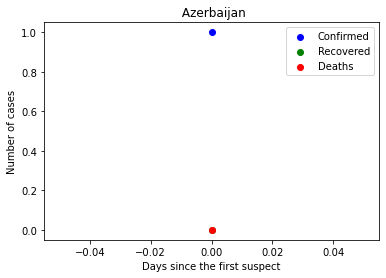

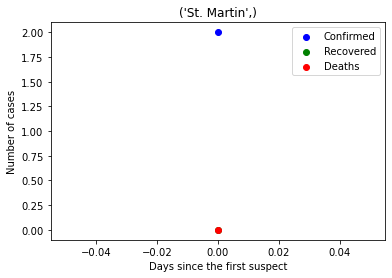

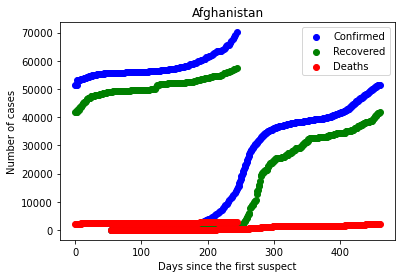

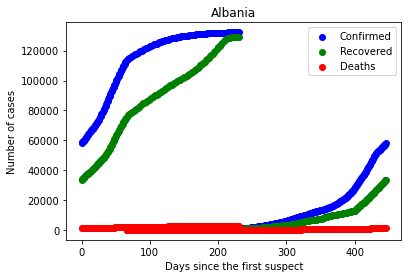

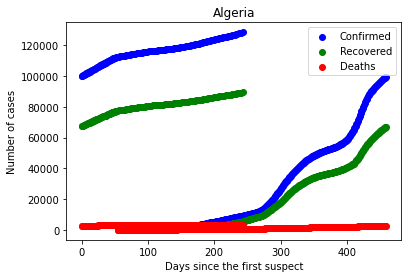

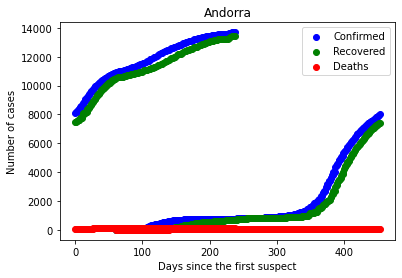

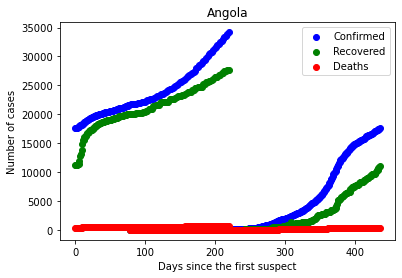

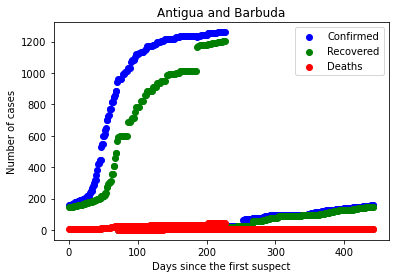

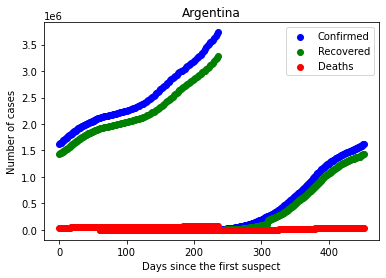

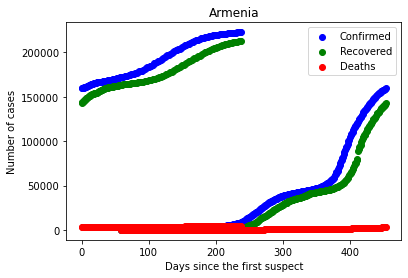

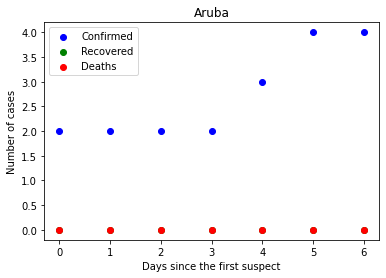

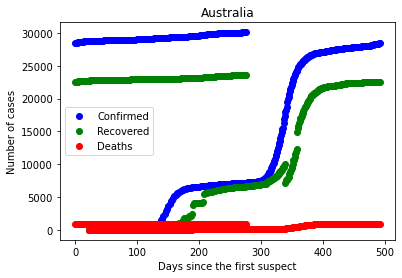

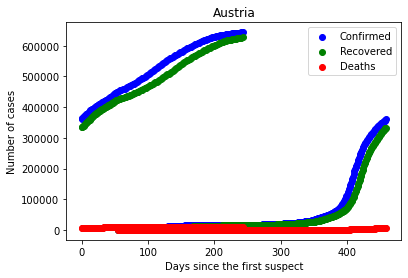

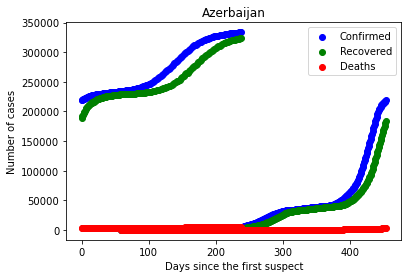

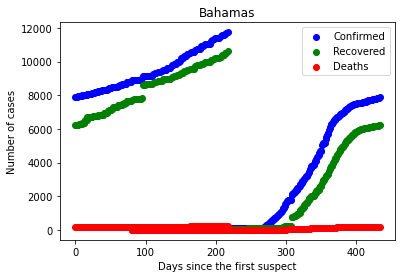

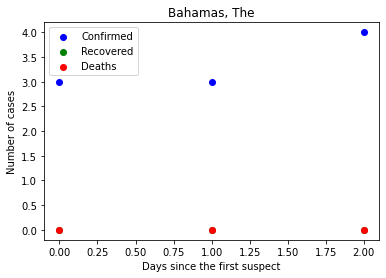

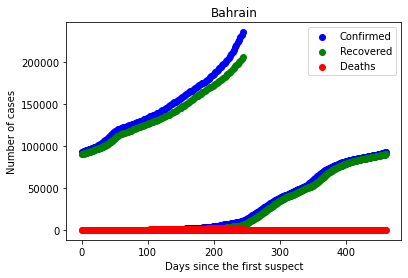

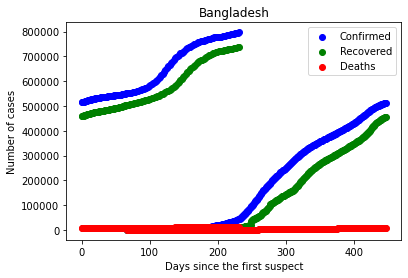

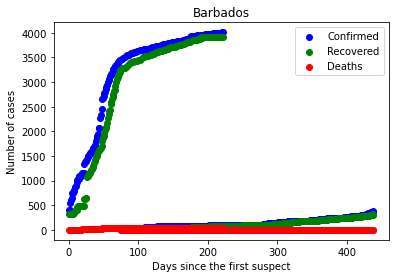

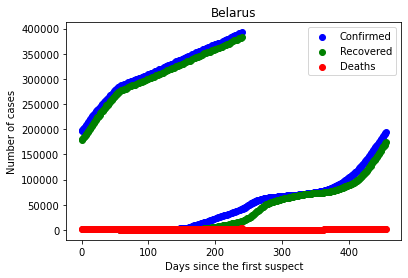

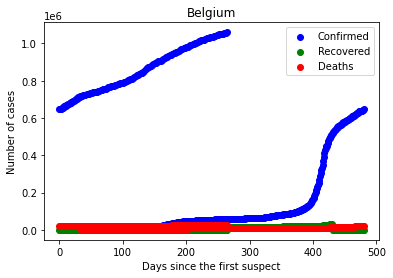

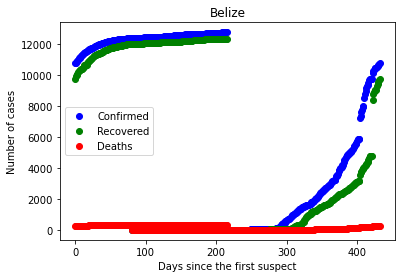

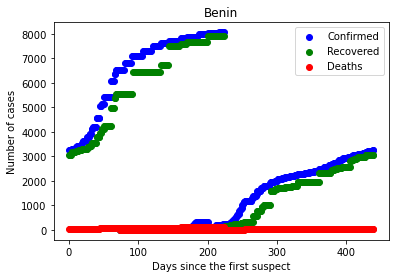

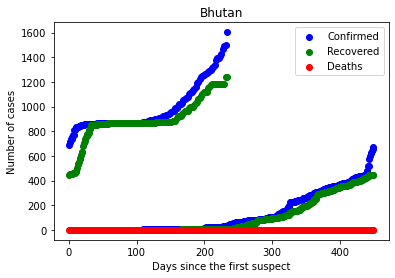

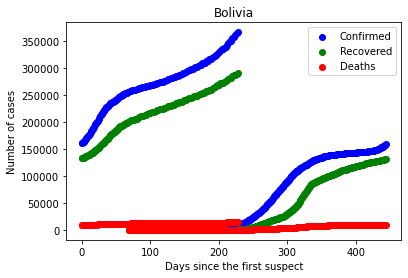

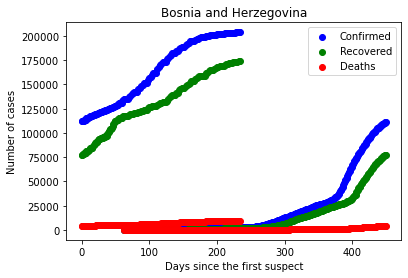

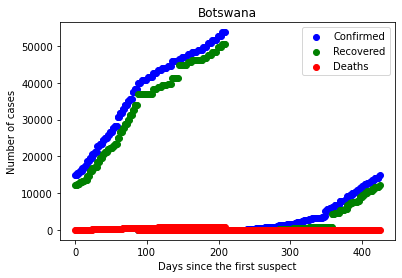

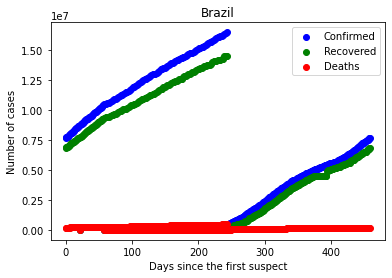

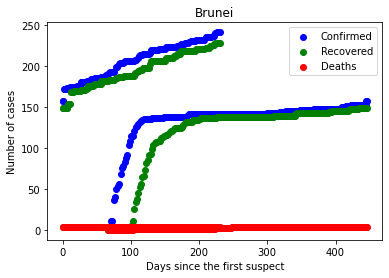

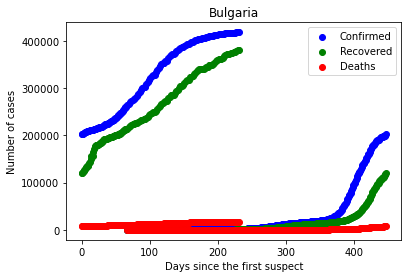

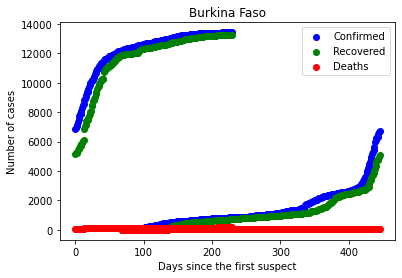

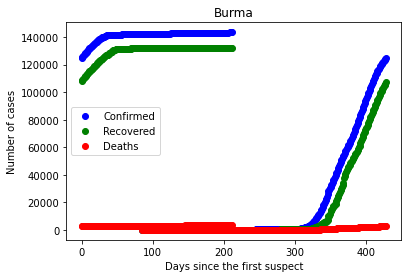

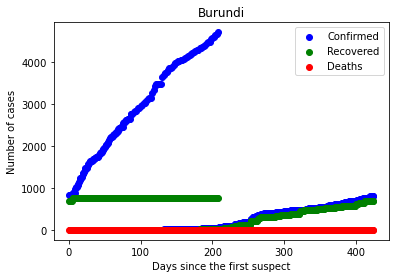

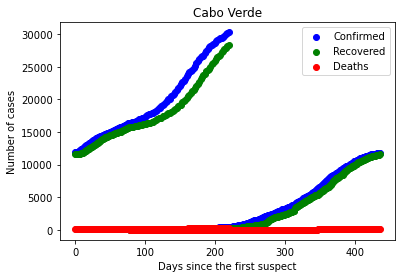

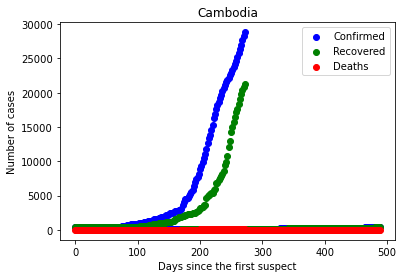

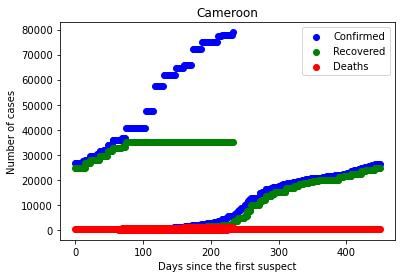

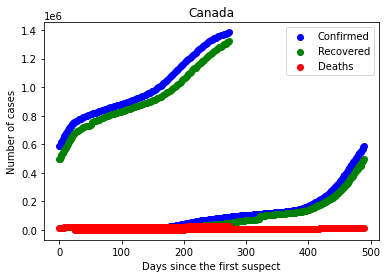

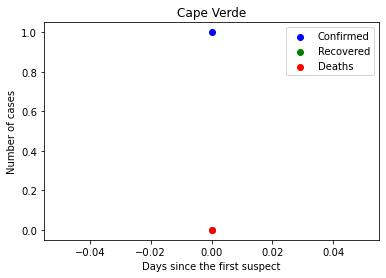

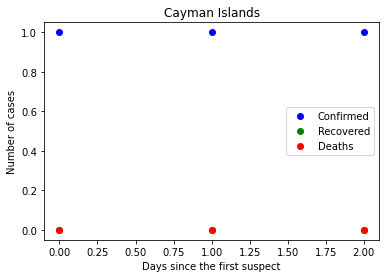

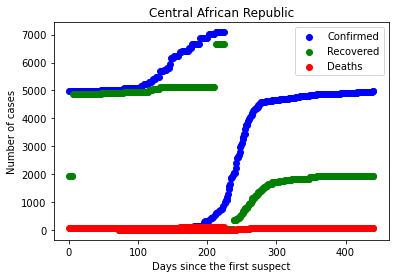

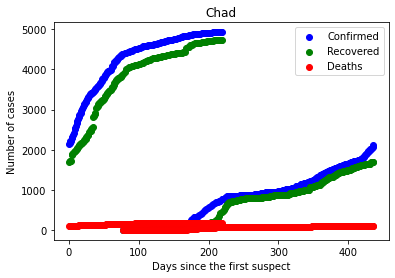

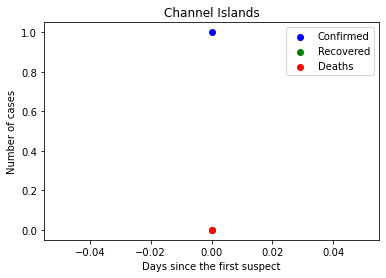

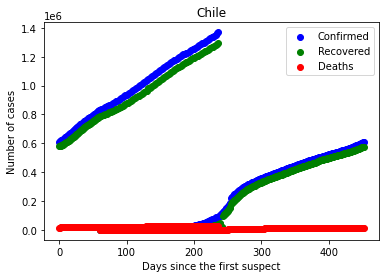

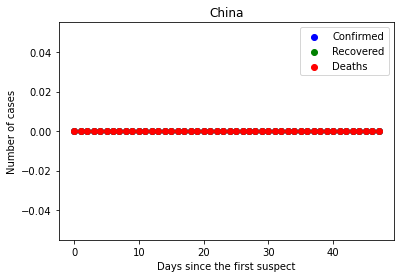

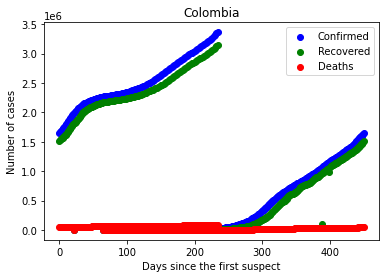

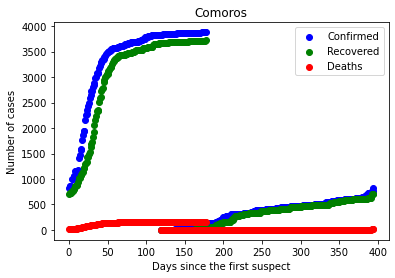

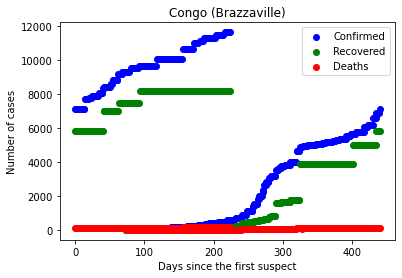

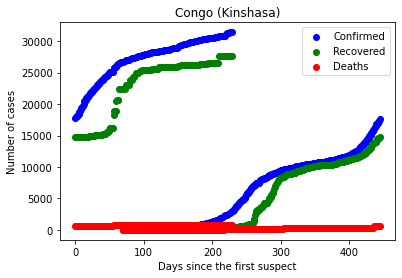

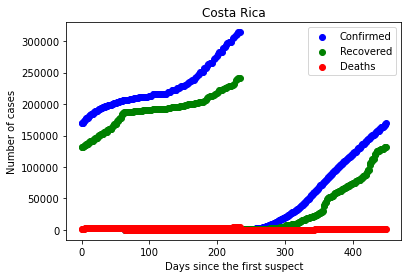

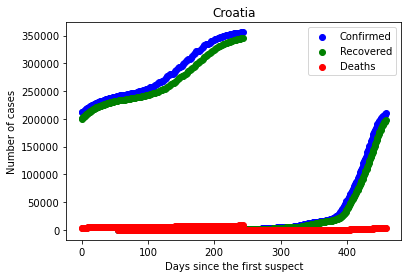

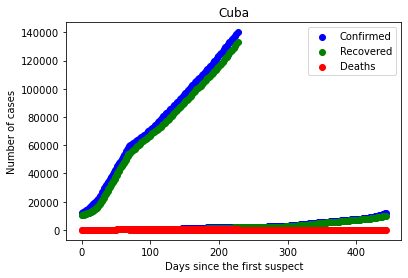

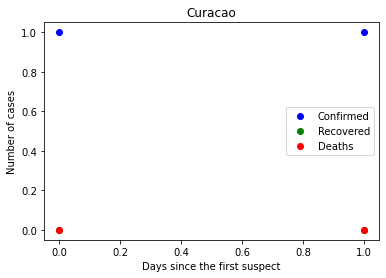

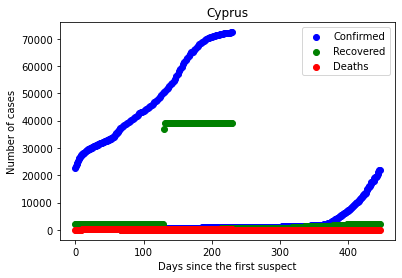

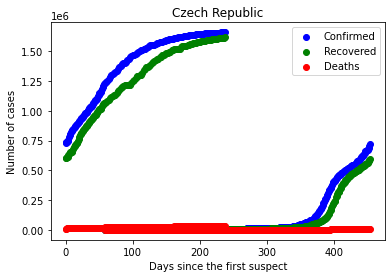

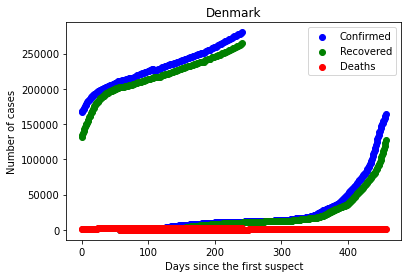

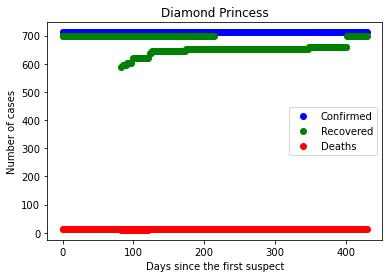

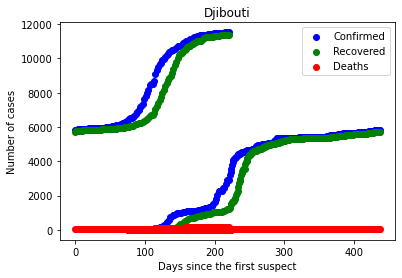

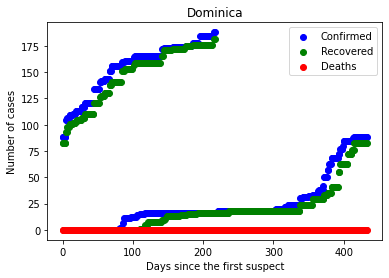

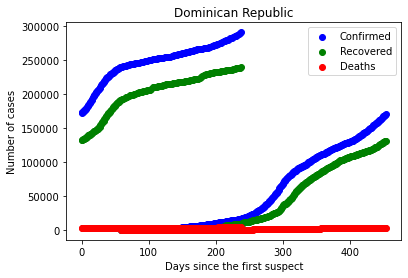

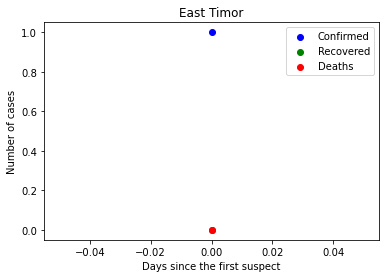

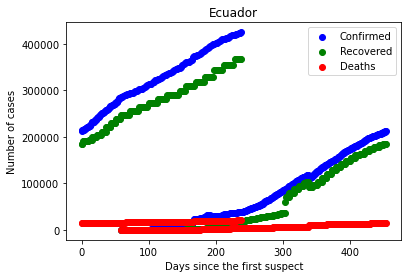

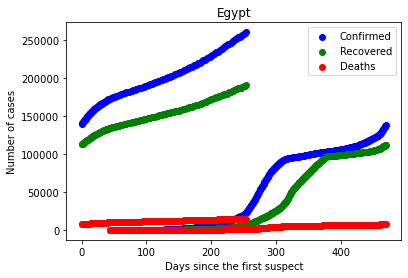

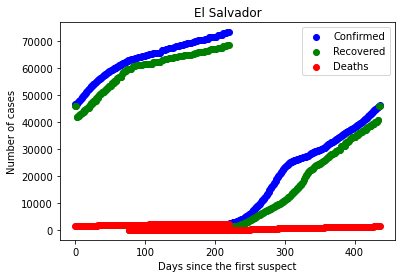

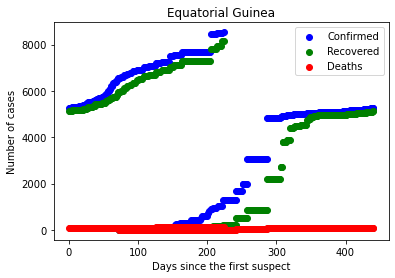

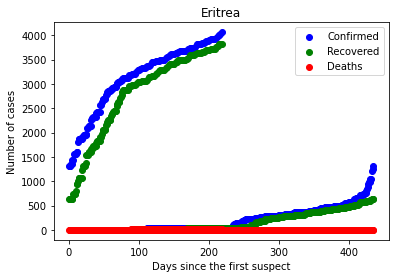

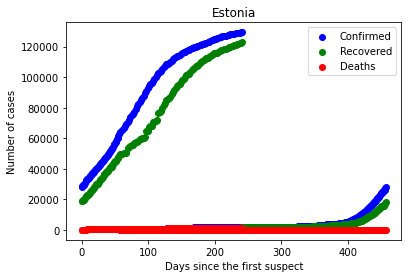

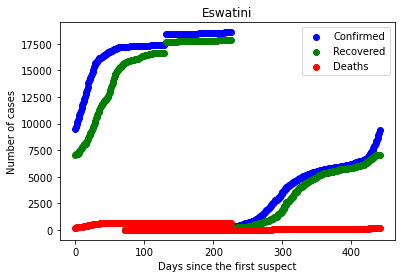

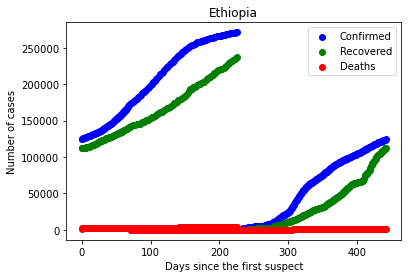

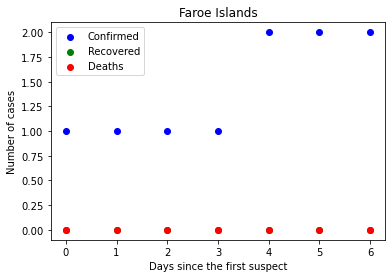

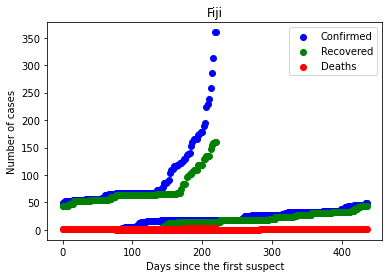

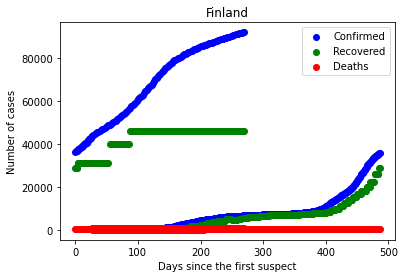

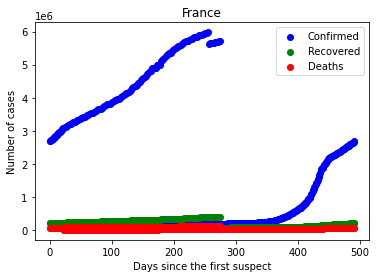

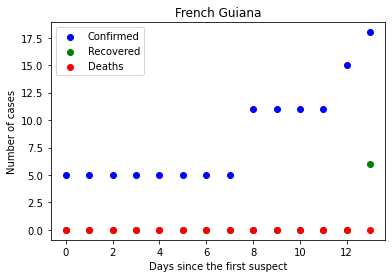

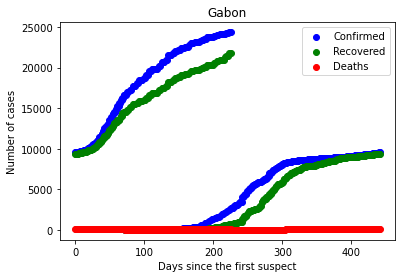

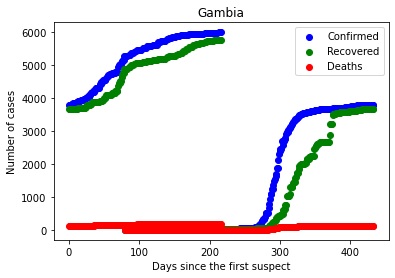

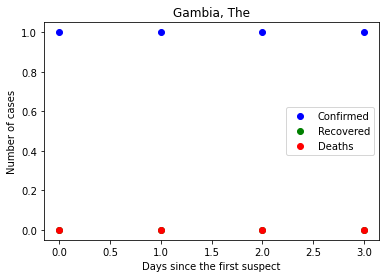

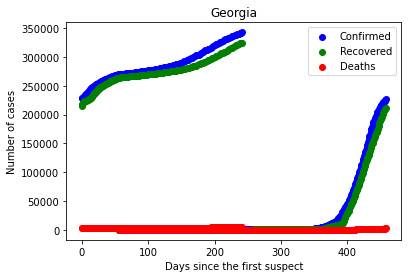

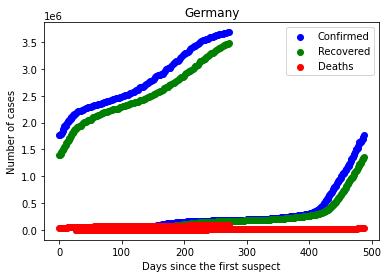

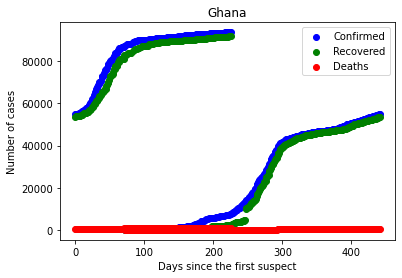

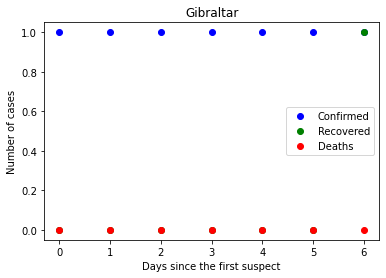

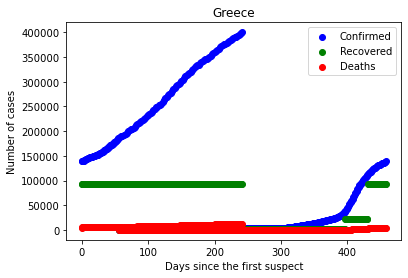

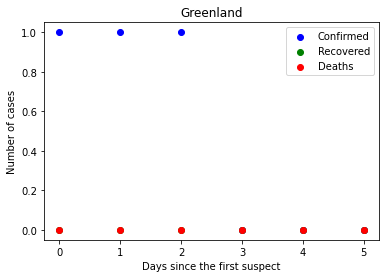

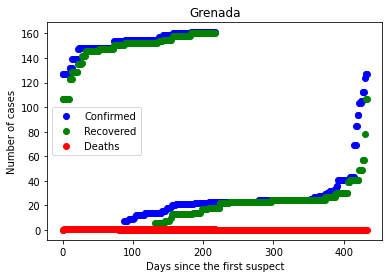

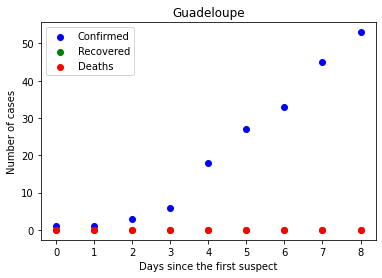

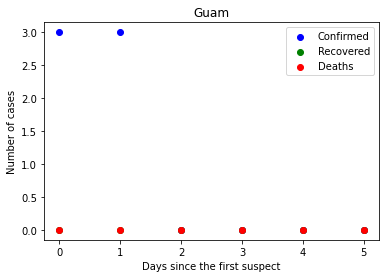

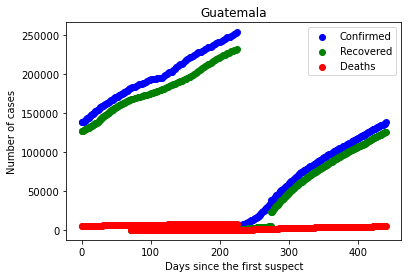

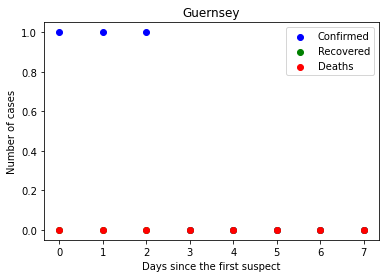

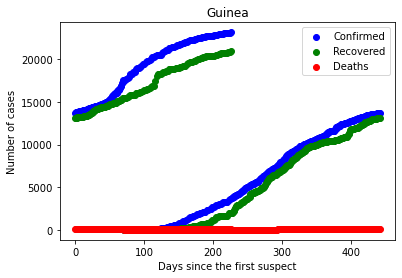

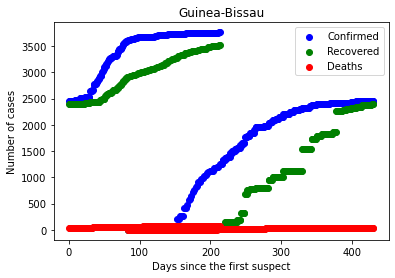

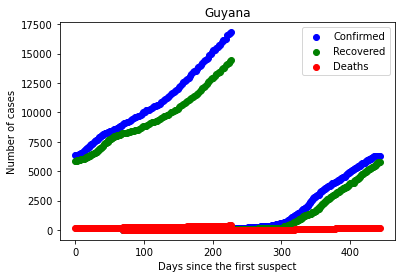

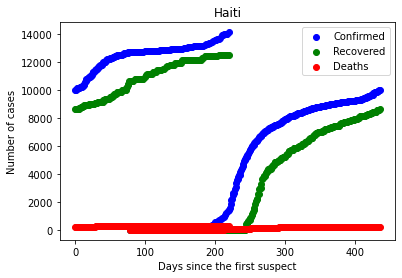

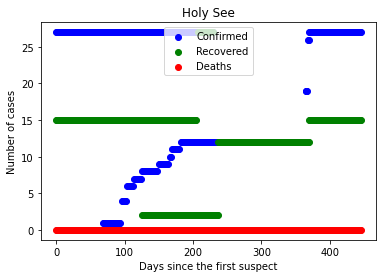

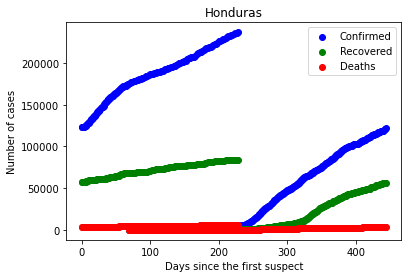

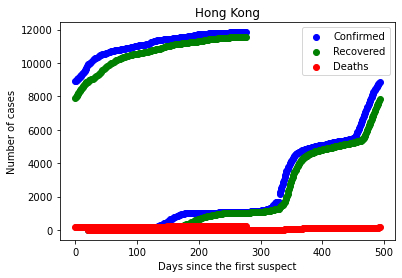

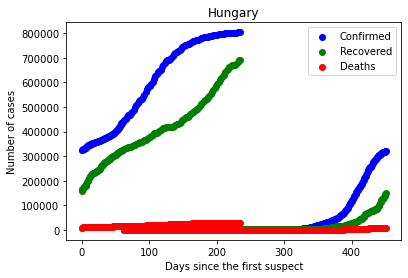

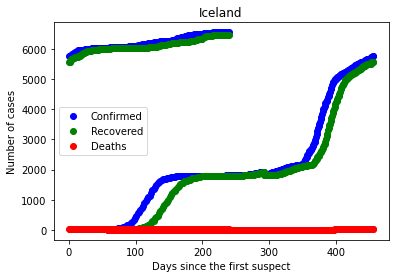

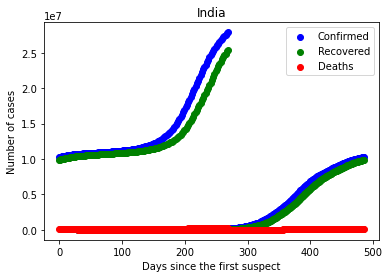

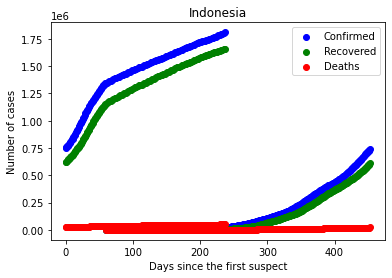

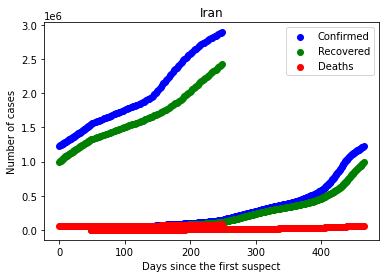

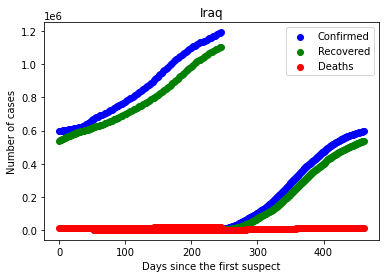

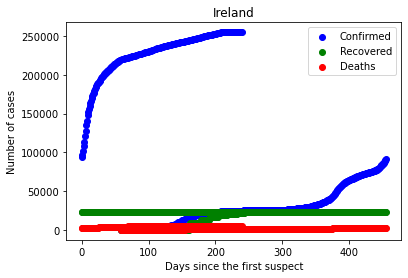

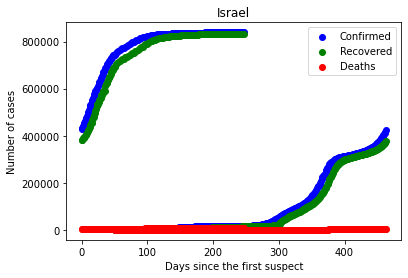

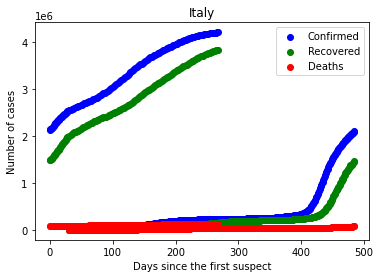

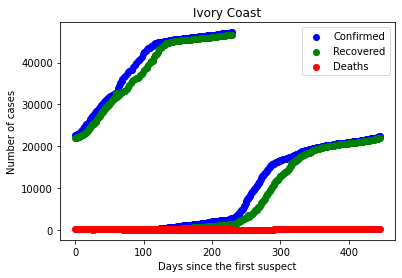

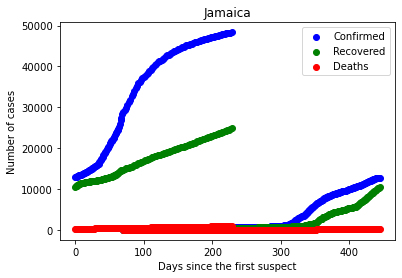

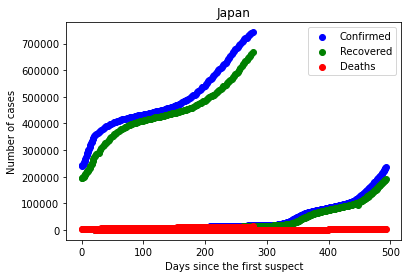

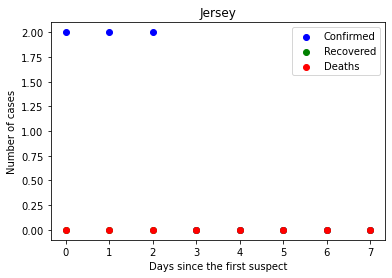

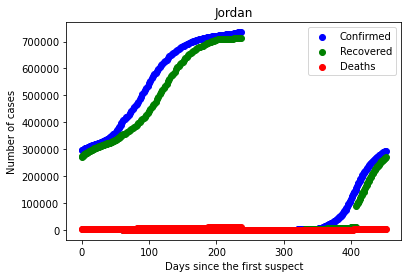

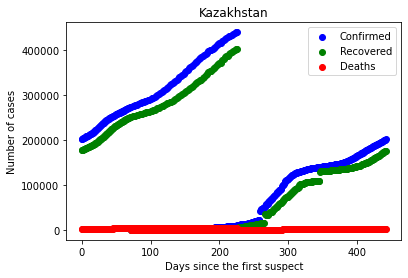

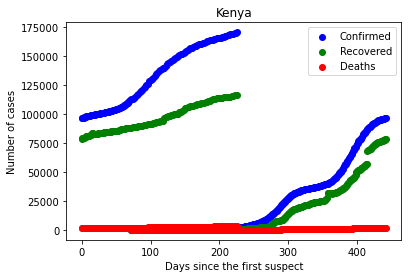

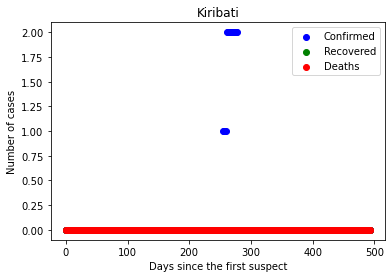

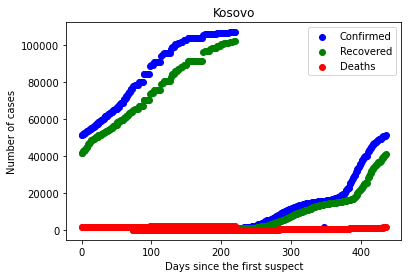

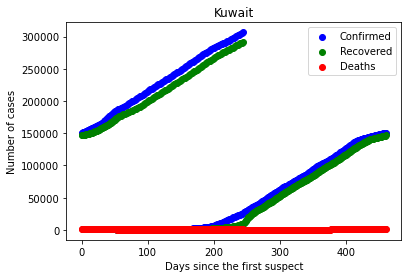

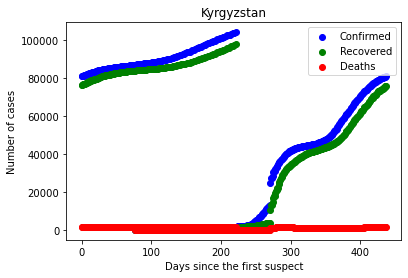

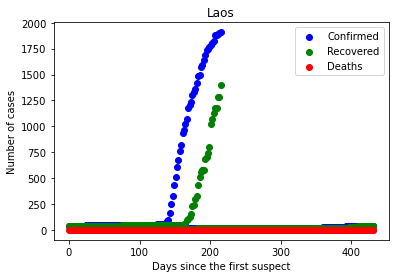

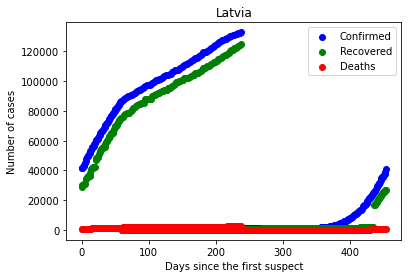

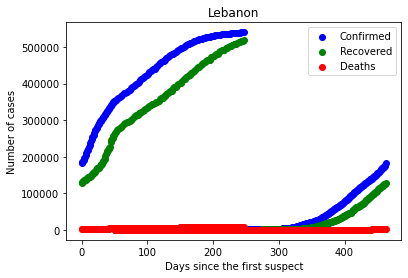

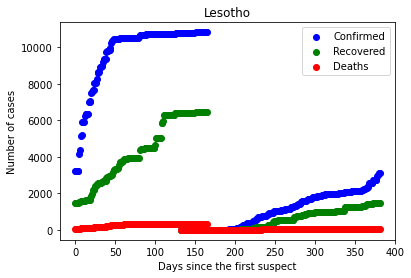

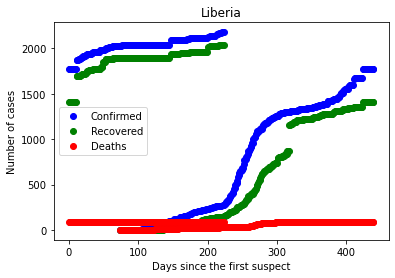

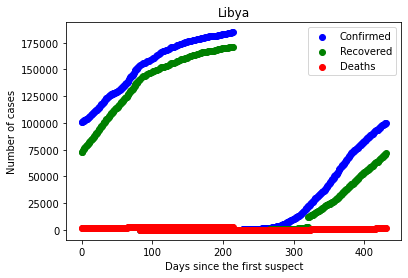

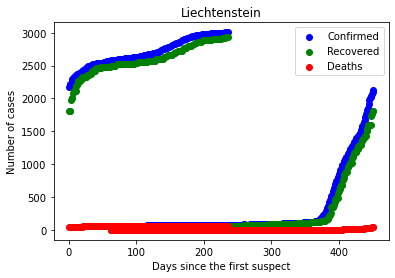

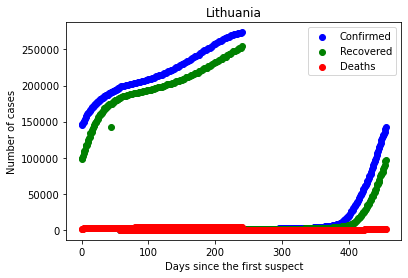

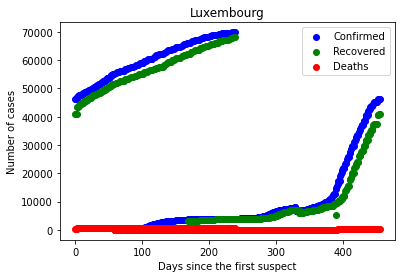

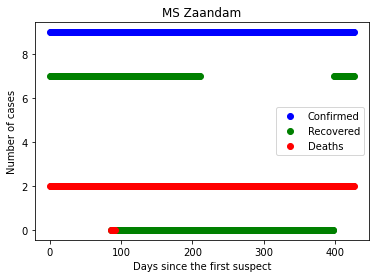

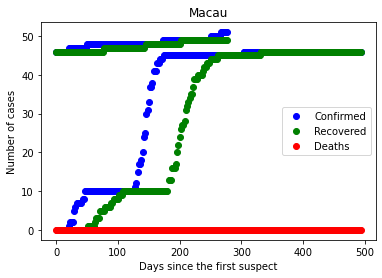

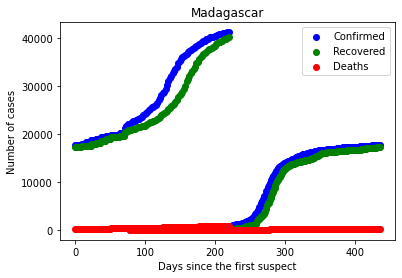

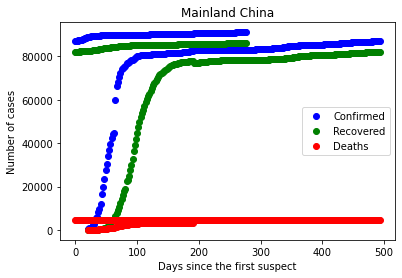

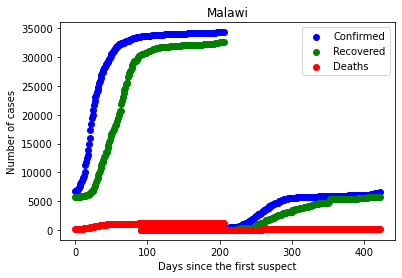

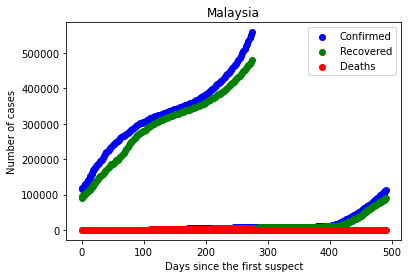

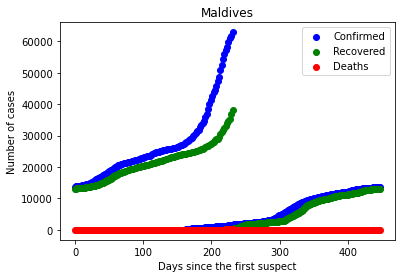

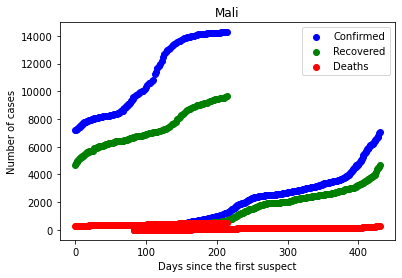

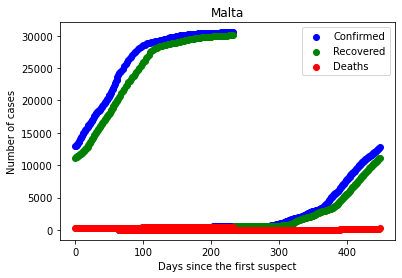

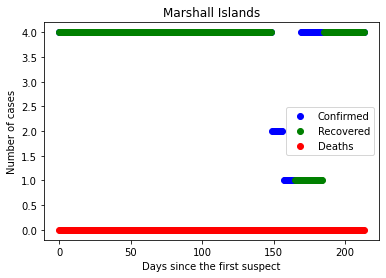

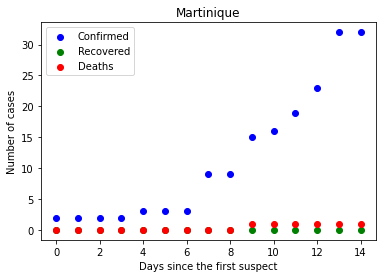

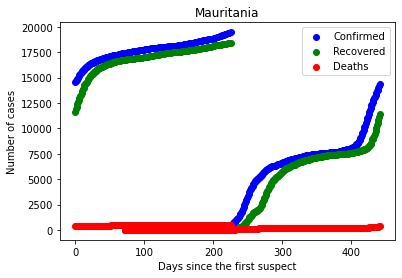

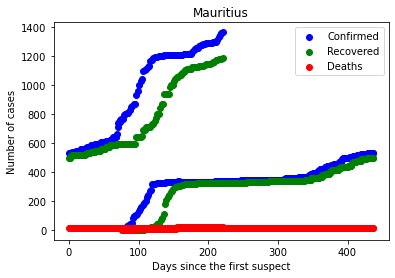

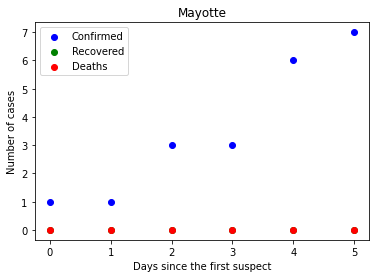

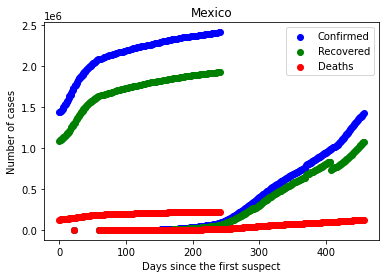

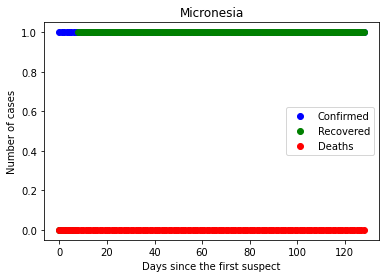

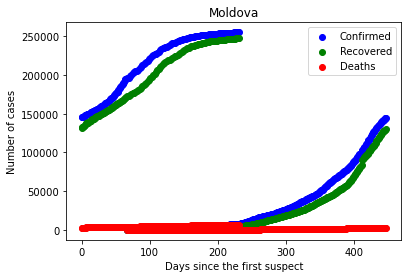

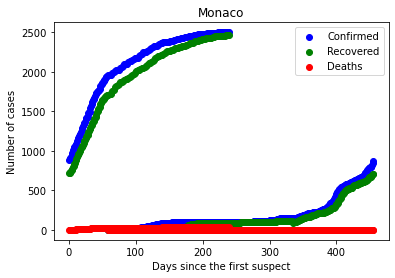

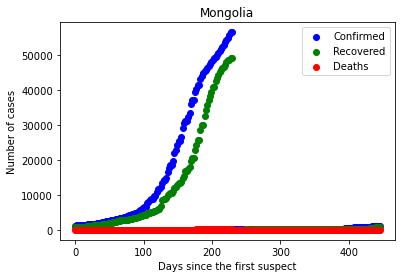

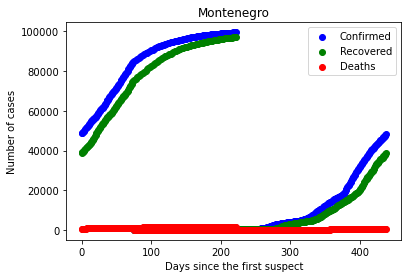

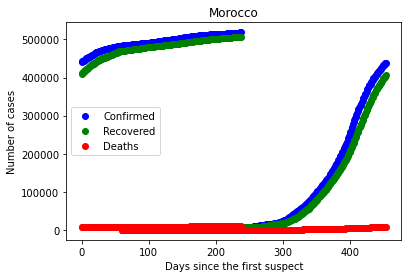

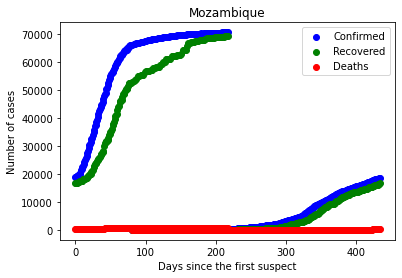

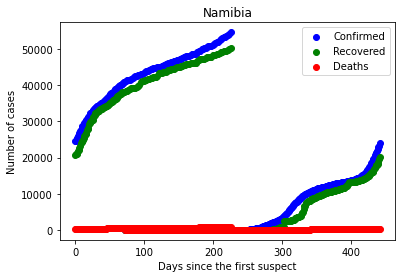

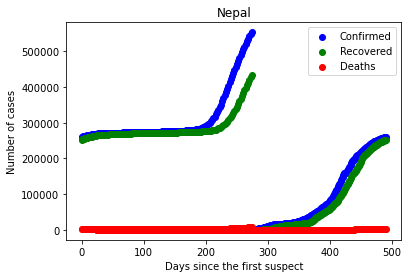

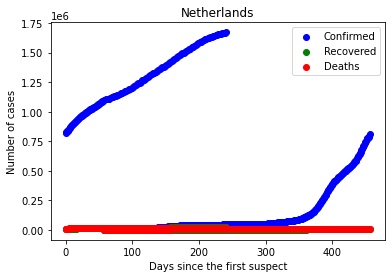

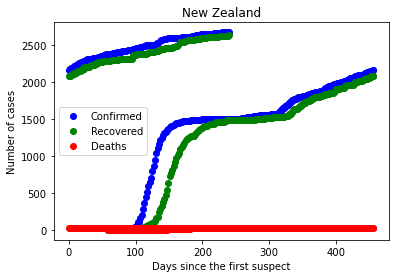

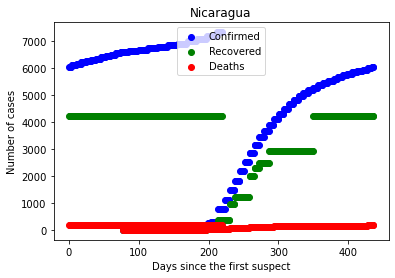

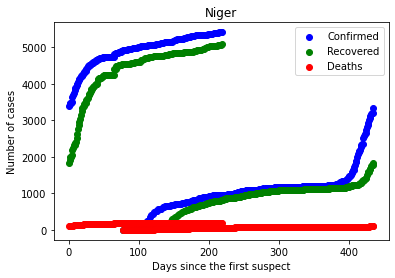

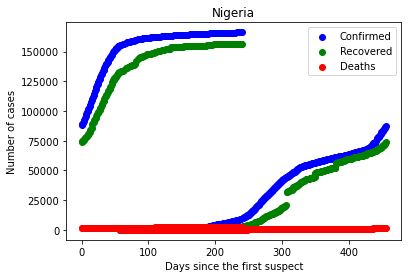

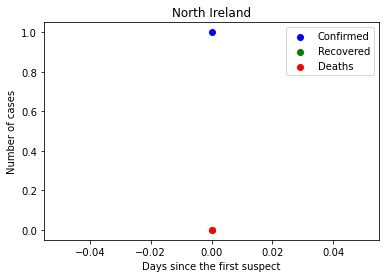

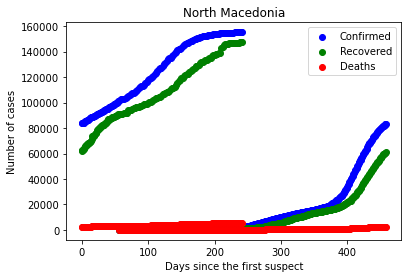

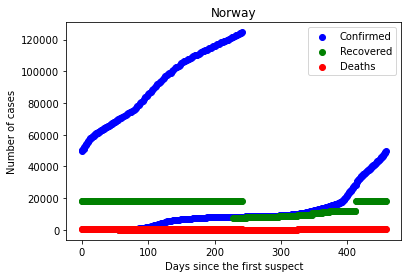

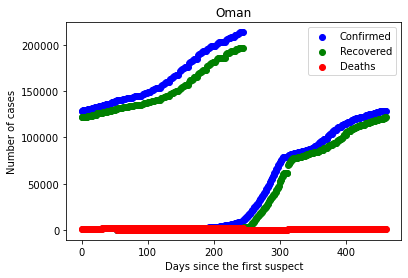

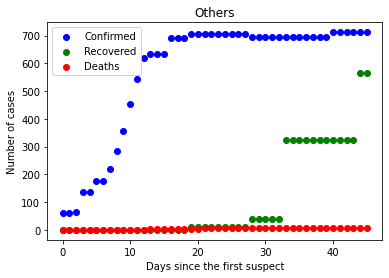

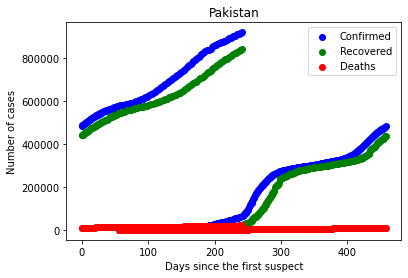

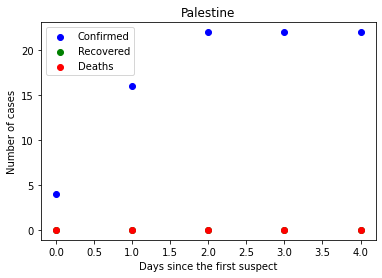

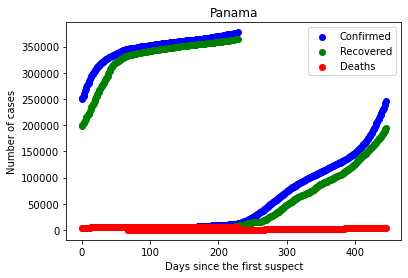

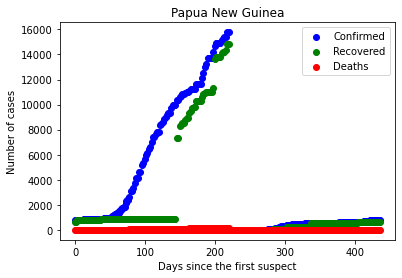

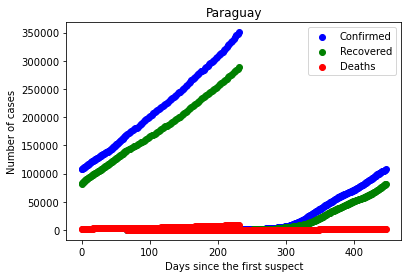

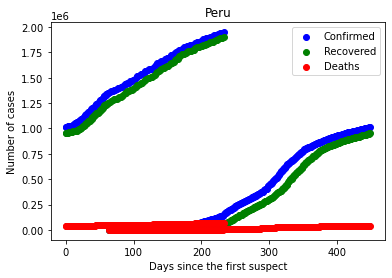

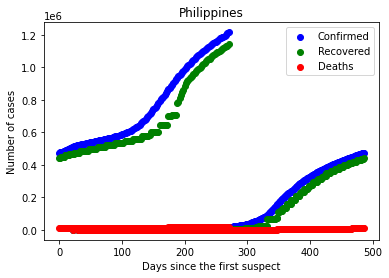

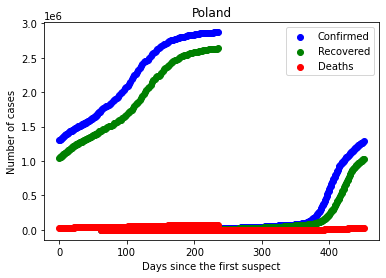

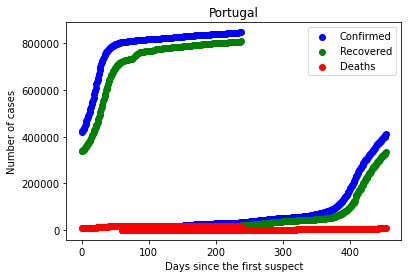

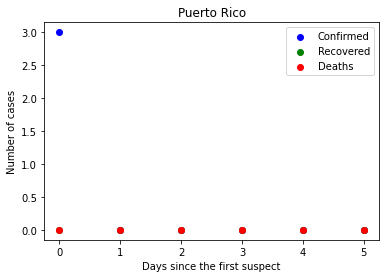

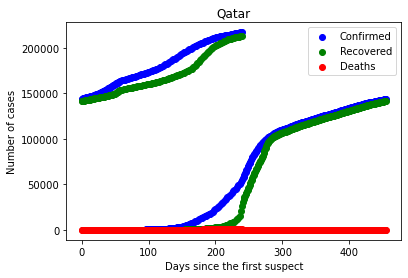

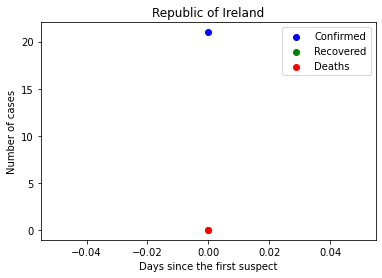

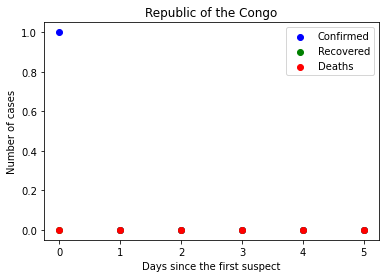

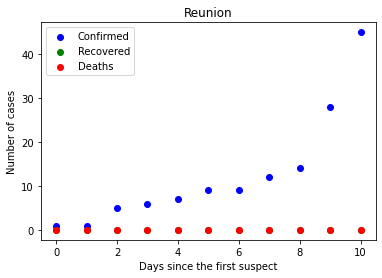

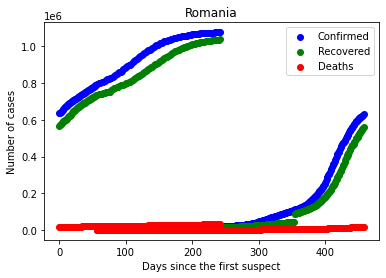

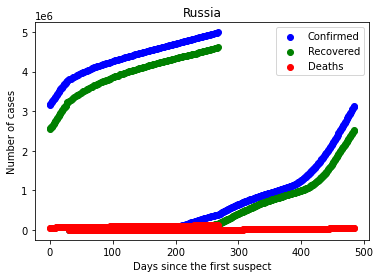

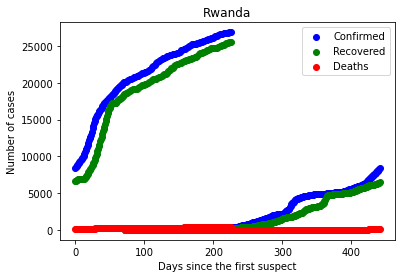

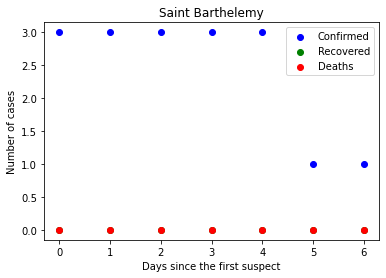

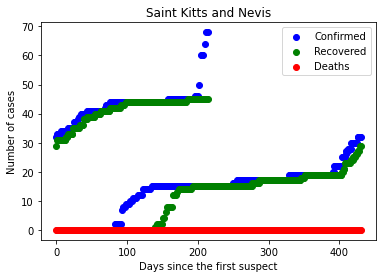

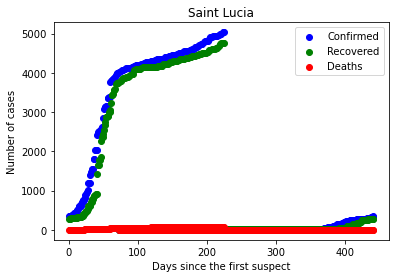

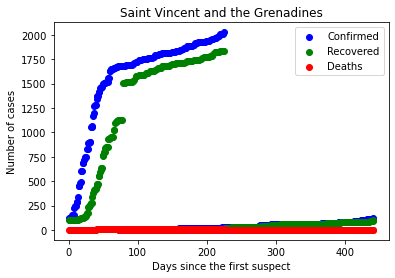

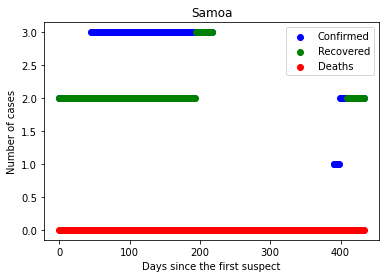

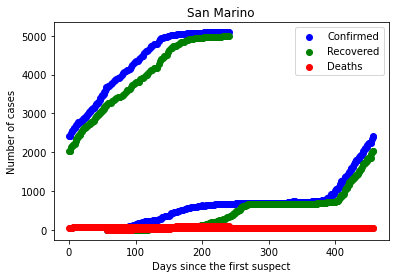

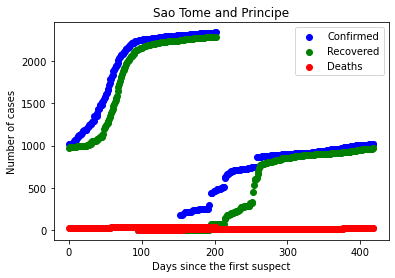

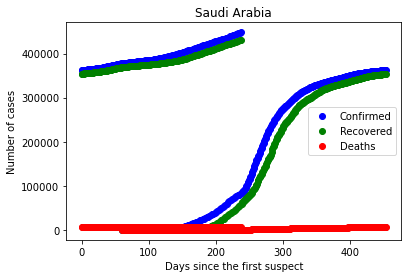

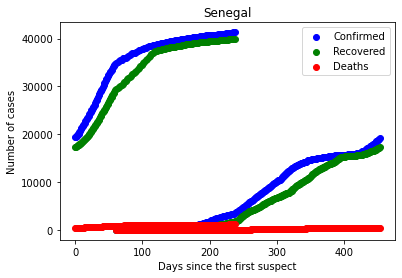

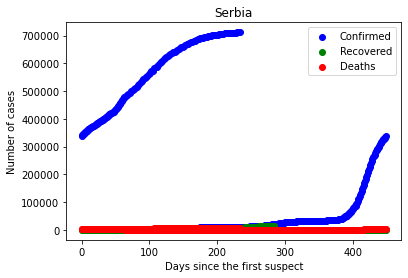

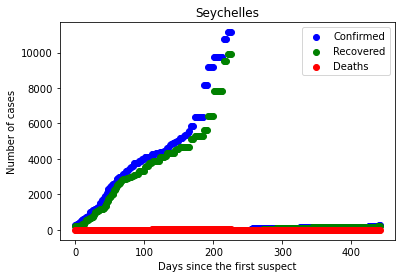

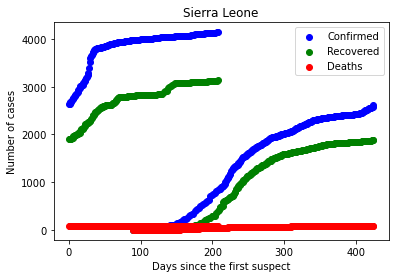

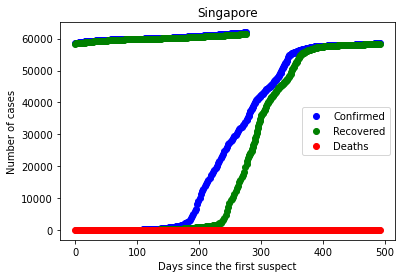

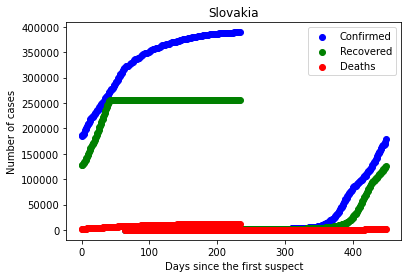

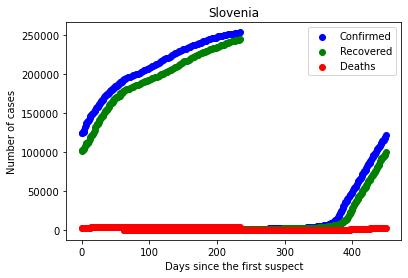

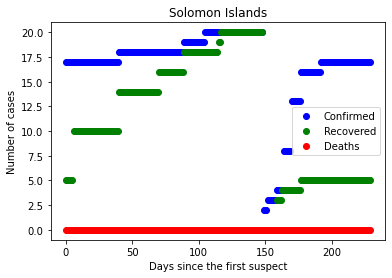

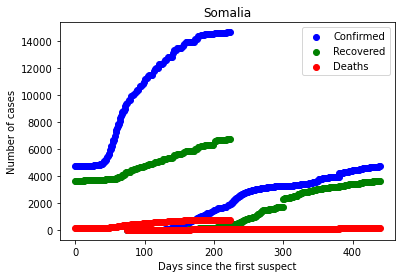

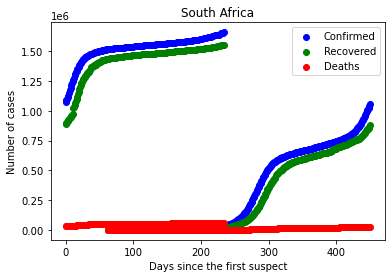

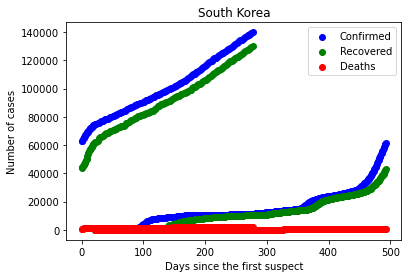

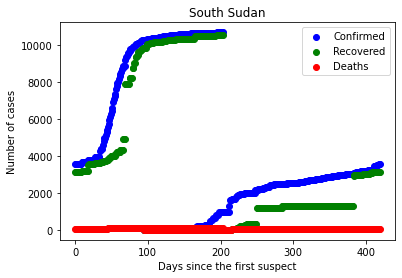

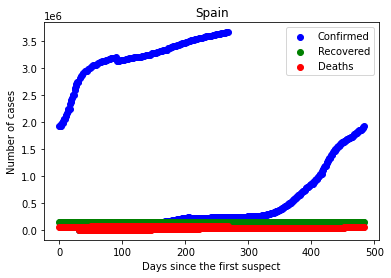

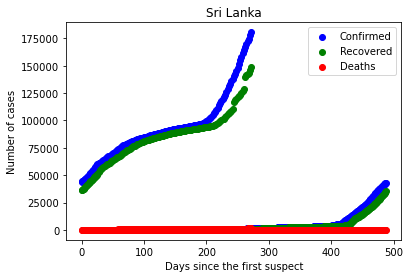

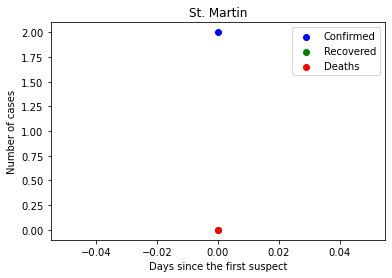

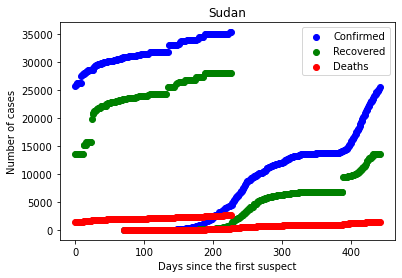

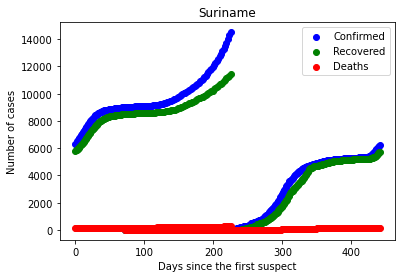

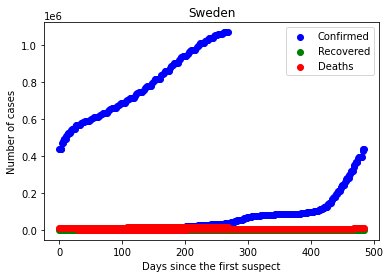

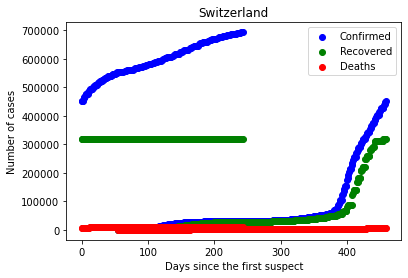

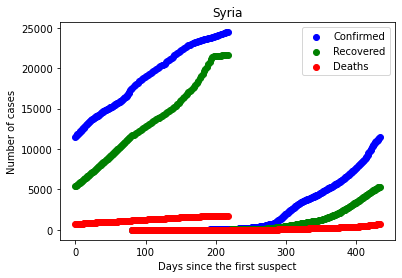

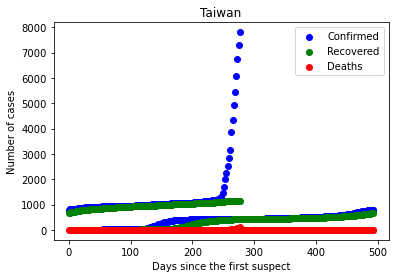

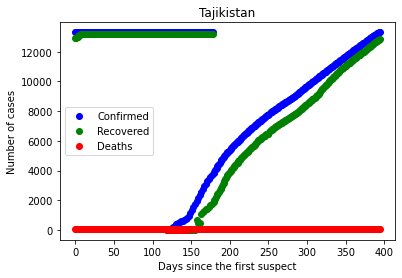

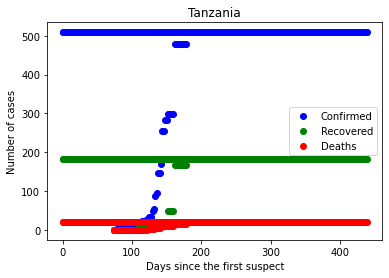

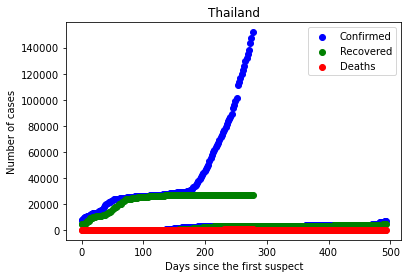

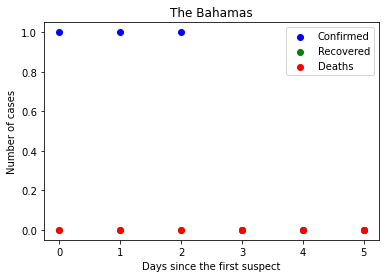

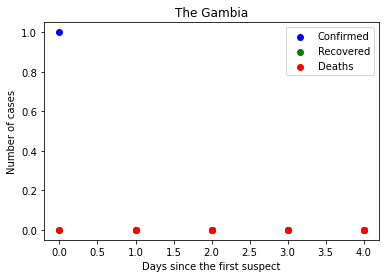

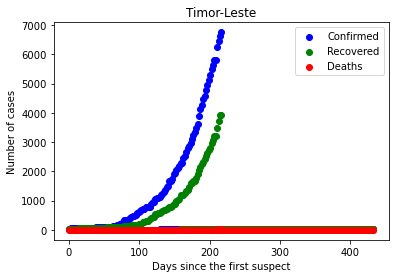

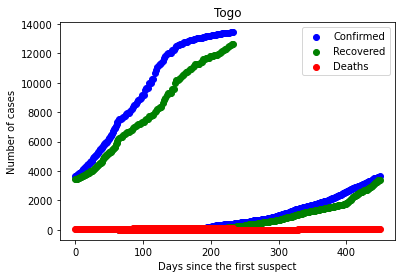

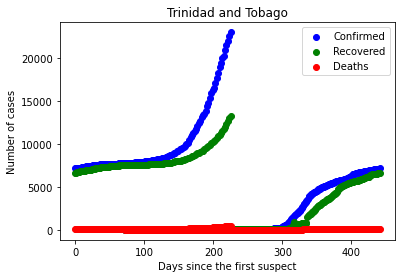

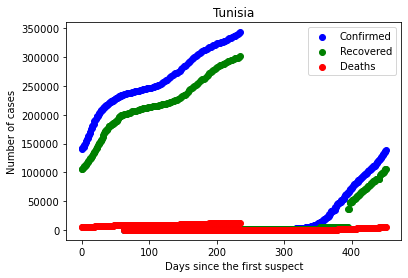

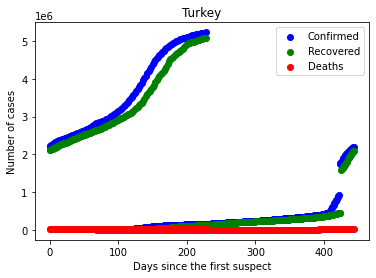

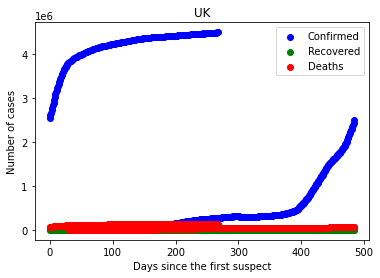

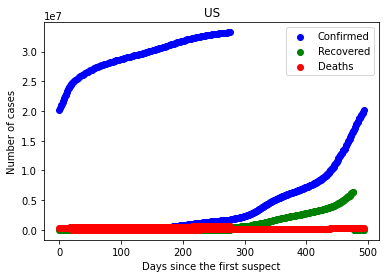

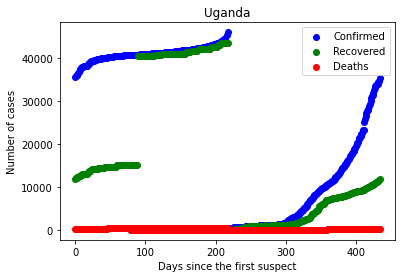

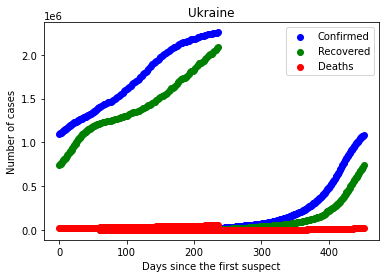

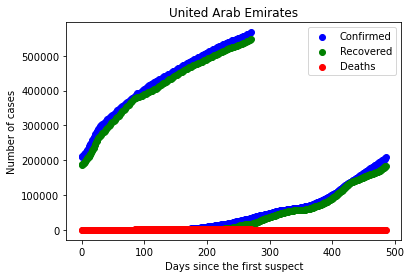

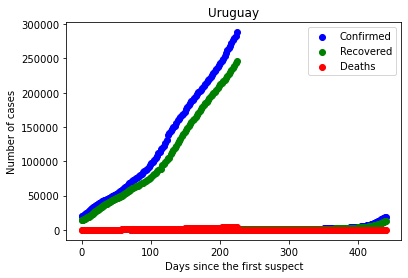

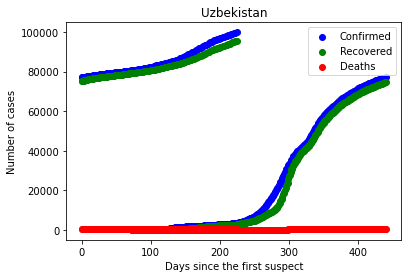

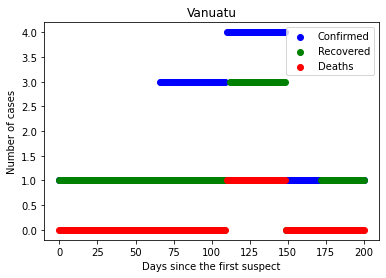

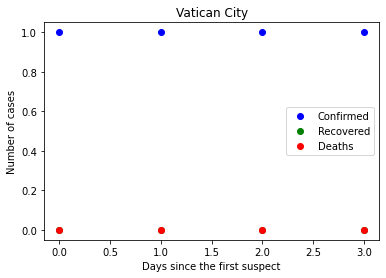

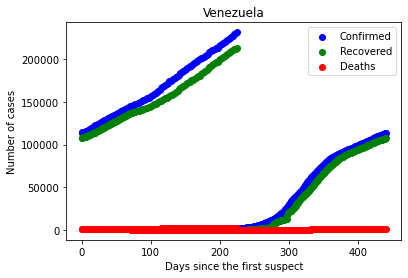

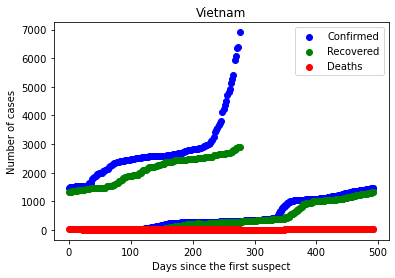

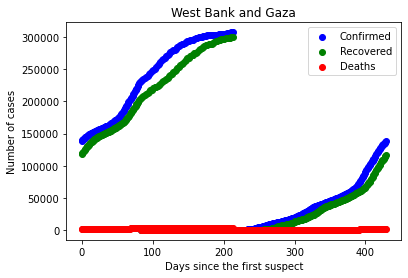

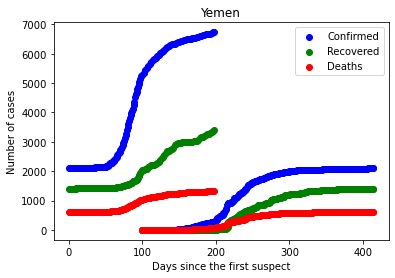

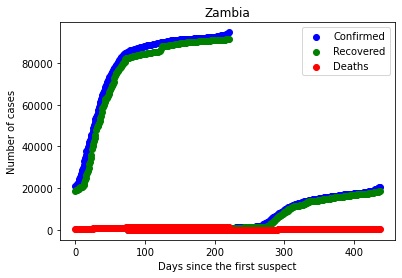

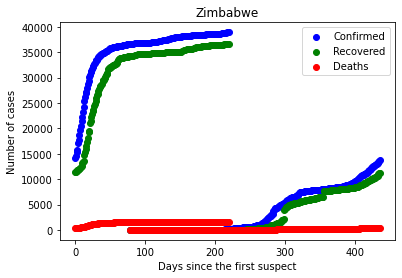

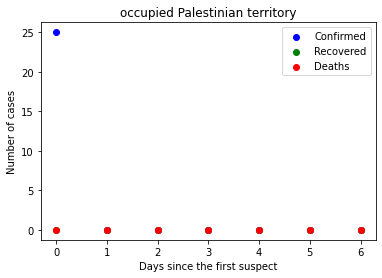

In [11]:
for idx in range(0,len(countries)):    
    C = df2[df2['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [12]:
df3 = df2.groupby(['ObservationDate'])[['ObservationDate','Confirmed','Deaths','Recovered']].sum().reset_index()

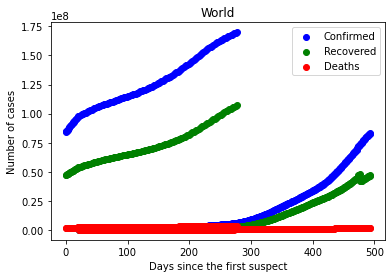

In [13]:
C = df3
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

# Part-2

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("covid_19_data.csv")

In [15]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [16]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [17]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

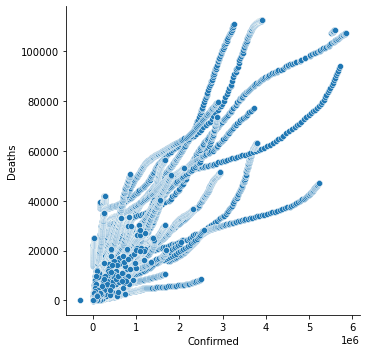

In [18]:
sns.relplot(x='Confirmed',y='Deaths',data=df)

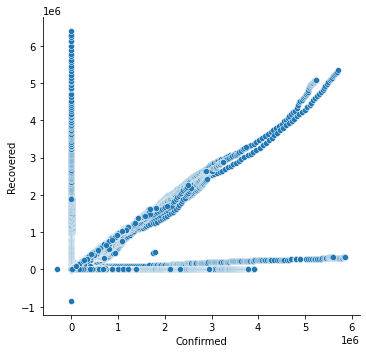

In [19]:
sns.relplot(x='Confirmed',y='Recovered',data=df)

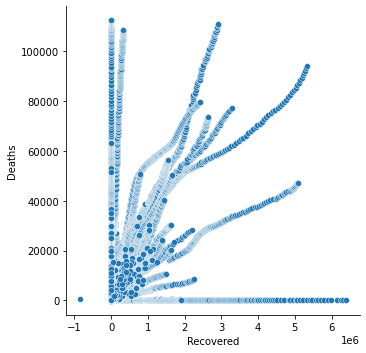

In [20]:
sns.relplot(x='Recovered',y='Deaths',data=df)

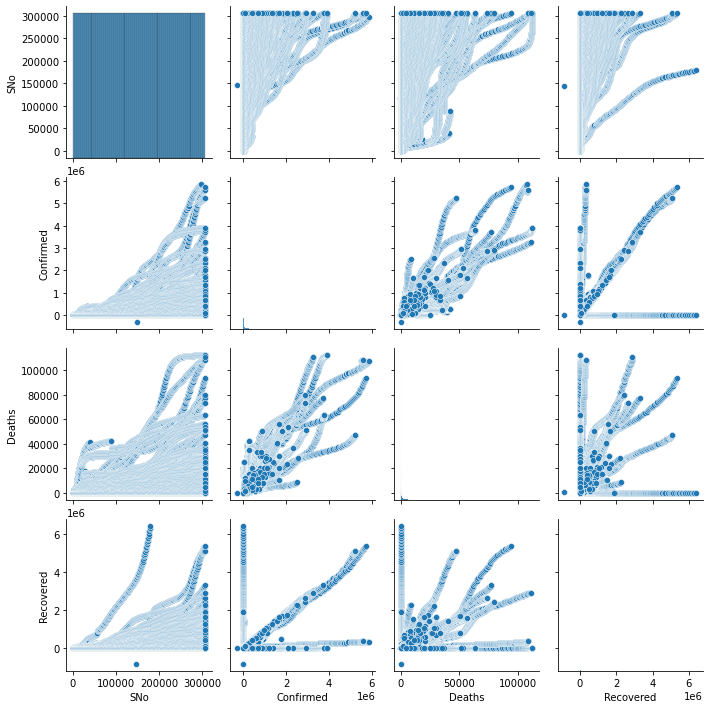

In [21]:
sns.pairplot(df)